# Loan Approval Prediction

# This notebook builds a machine learning model to predict loan approval status based on historical data.
# The steps include data preprocessing, feature engineering, model training, and evaluation.

# Author: [Haider Maseeh]
# Date: [22 October 2024]


In [2]:
# Importing necessary libraries
# pandas: For data manipulation and analysis
# numpy: For numerical computations
# sklearn: For machine learning models and utilities
# Importing matplotlib and seaborn  libraries for visualization

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


In [3]:
# Reading the loan dataset
# Ensure the dataset is correctly loaded and check for missing or erroneous data.

train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
test_ids=test['id']

In [4]:
train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [5]:
# Handling missing values
# This ensures the model doesn't encounter NaN values during training.
train.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [6]:
#information of the train set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [7]:
#droping id from train and test set as it won't use in features
train=train.drop(['id'],axis=1)
test=test.drop(['id'],axis=1)

<AxesSubplot: xlabel='loan_status', ylabel='count'>

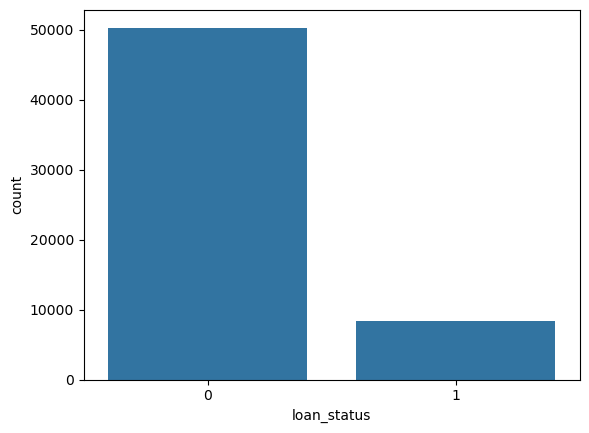

In [8]:
#visualizating  loan status from train set
sns.countplot(x='loan_status', data=train)


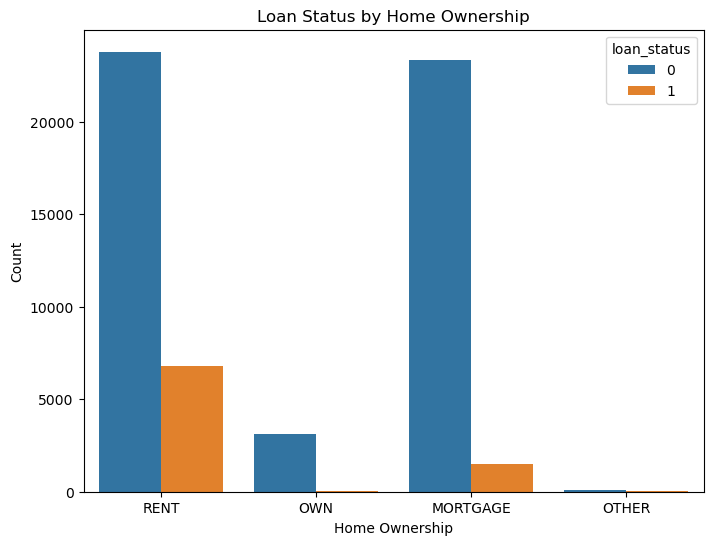

In [9]:
#visualizating  person home ownership and loan status  from train set
plt.figure(figsize=(8, 6))
sns.countplot(x='person_home_ownership', hue='loan_status', data=train)
plt.title('Loan Status by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()


In [10]:
# Feature engineering
# Create new features from the existing ones to capture more information.
# Examples: Converting categorical variables to numerical using Label Encoder from sklearn library , creating interaction terms.

lb=LabelEncoder()
cols=['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']
for col in cols:
    train[col]=lb.fit_transform(train[col])
    test[col]=lb.fit_transform(test[col])
    print(lb.classes_)


['MORTGAGE' 'OTHER' 'OWN' 'RENT']
['DEBTCONSOLIDATION' 'EDUCATION' 'HOMEIMPROVEMENT' 'MEDICAL' 'PERSONAL'
 'VENTURE']
['A' 'B' 'C' 'D' 'E' 'F' 'G']
['N' 'Y']


In [11]:
# Train-Test Split
# Splitting the data into training and testing sets to evaluate the model on unseen data.
# Ensure an 80-20 split to maintain a balanced dataset for training and validation.

y=train['loan_status']
X=train.drop(['loan_status'], axis = 1)
X_train,  X_test , y_train , y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
# Training the model
# Fit the model on the training data. Cross-validation is used to tune the model and prevent overfitting.
# We'll also implement grid search or random search for hyperparameter optimization.

def models(model):
    print(model)
    score=cross_val_score(model, X, y, cv=5)
    print(score)
    print(score.mean())

In [20]:
# Model Initialization
# Initialize the model with default hyperparameters. In this case, we are using a Random Forest classifier.
# Random Forest is selected for its robustness and ability to handle categorical features.

model = RandomForestClassifier(max_depth=10,min_samples_split=8)
models(model)
clf=model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=8)
[0.94517862 0.94688379 0.94713957 0.94875949 0.94918578]
0.9474294483758205


In [14]:
#creating a prediction on test set 
submission_pred=clf.predict(test)

In [15]:
#creating a new dataframe named "df" with ids and loan status 
df=pd.DataFrame({'id':test_ids,
                 'loan_status':submission_pred,
    
})

In [15]:
#converting dataframe to csv file
df.to_csv('submission.csv',index=False)